In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
res_df = pd.read_csv('../data/processed/0315-investigating-overlap.csv', index_col=0)

## Contingency table: 58 cases have both urination and defecation

In [3]:
contingency_tbl = np.zeros((2,2))

if_urination = res_df['U-duration (s)'] != 0
if_defecation = res_df['D-duration (s)'] != 0

contingency_tbl[0, 0] = sum(   if_defecation &    if_urination)
contingency_tbl[0, 1] = sum(   if_defecation &  (~if_urination))
contingency_tbl[1, 0] = sum( (~if_defecation) &   if_urination)
contingency_tbl[1, 1] = 0

In [4]:
pd.DataFrame(
    contingency_tbl.astype(int),
    columns=['U-Y', 'U-N'],
    index = ['D-Y', 'D-N']
)

,U-Y,U-N
D-Y,58,1
D-N,85,0


## 24 out of 58 have overlaps

In [5]:
res_sub_df = res_df[if_defecation & if_urination]

sum(res_sub_df['O-duration (s)'] > 0), len(res_sub_df)

(24, 58)

## Visualize the 24 overlap cases

In [6]:
# time
overlaps_df = res_sub_df[res_sub_df['O-duration (s)'] > 0]
time_overlap = overlaps_df['O-duration (s)'] / (
    overlaps_df['U-duration (s)'] + overlaps_df['D-duration (s)'] - overlaps_df['O-duration (s)'])
# weight
weight_overlap = overlaps_df['O-weight (kg)'] / (
    overlaps_df['U-weight (kg)'] + overlaps_df['D-weight (kg)'] - overlaps_df['O-weight (kg)'])

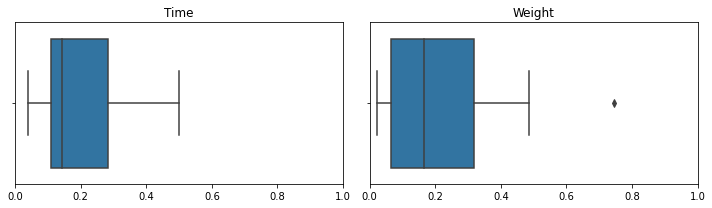

In [7]:
plt.figure(figsize=(10, 3))
plt.subplot(121)
sns.boxplot(x = time_overlap)
plt.xlim(0, 1)
plt.title('Time')

plt.subplot(122)
sns.boxplot(x = weight_overlap)
plt.xlim(0, 1)
plt.title('Weight')

plt.tight_layout()

plt.savefig('../reports/figures/overlap-evaluation.png')
pass

In [8]:
np.mean(time_overlap), np.std(time_overlap)

(0.1953236254485714, 0.12486104310243062)

In [9]:
np.mean(weight_overlap), np.std(weight_overlap)

(0.21756488620401093, 0.17941145787806909)